<a href="https://colab.research.google.com/github/dsmohiit/Machine-Learning-Repo/blob/main/Filter_Method_of_Feature_Selection_Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [ ]:
df.shape

(7352, 563)

In [ ]:
df.dropna(axis= 0, inplace= True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Extracting input and output features
x = df.drop(columns= "Activity", axis= 1)
y = df["Activity"]

# Label encoding activity
le = LabelEncoder()
y = le.fit_transform(y)

# Spliting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)
print("Shape of X_train", x_train.shape)
print("Shape of X_test", x_test.shape)

# Fitting the logistics regression
model = LogisticRegression(max_iter= 1000)
model.fit(x_train, y_train)

# Predicting
y_pred = model.predict(x_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)

print("The accuracy is: ", round(accuracy * 100, 2))

Shape of X_train (5881, 562)
Shape of X_test (1471, 562)
The accuracy is:  98.23


In [ ]:
"""
The accuracy of the model is comming out to be 98 % with all the columns i.e. before applying feature selection
"""

'\nThe accuracy of the model is comming out to be 98 % with all the columns i.e. before applying feature selection\n'

# Feature Selection

#### 1. Removing Duplicate Features

In [ ]:
# Function to identify duplicate columns

def get_duplicate_columns(df):
    duplicate_columns = {}
    seen_columns = {}

    for column in df.columns:
        current_column = df[column]

        try:
          current_column_hash = current_column.values.tobytes()

        except AttributeError:
          current_column_hash = current_column.to_string.encode()

        if current_column_hash in seen_columns:
          if seen_columns[current_column_hash] in duplicate_columns:
            duplicate_columns[seen_columns[current_column_hash]].append(column)

          else:
            duplicate_columns[seen_columns[current_column_hash]] = [column]

        else:
          seen_columns[current_column_hash] = column

    return duplicate_columns

In [ ]:
duplicate_columns = get_duplicate_columns(x_train)
duplicate_columns

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [ ]:
# Removing the duplicate columns
for one_list in duplicate_columns.values():
  x_train.drop(columns= one_list, inplace= True)
  x_test.drop(columns= one_list, inplace= True)

In [ ]:
print("Shape of X_train after droping the duplicate columns: ", x_train.shape)
print("Shape of X_test after droping the duplicate columns: ", x_test.shape)

Shape of X_train after droping the duplicate columns:  (5881, 541)
Shape of X_test after droping the duplicate columns:  (1471, 541)


#### 2. Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold= 0.05)

In [ ]:
selector.fit(x_train)

VarianceThreshold(threshold=0.05)

In [ ]:
selector.get_support()

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,

In [ ]:
("There are total"+ " " + str(selector.get_support().sum()) + " " + "columns that are above or equal to the variance threshold.")

'There are total 350 columns that are above or equal to the variance threshold.'

In [ ]:
columns = x_train.columns[selector.get_support()]
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=350)

In [ ]:
x_train = selector.transform(x_train)
x_test = selector.transform(x_test)

x_train = pd.DataFrame(x_train, columns= columns)
x_test = pd.DataFrame(x_test, columns= columns)

In [ ]:
print("Shape of X_train after applying Variance Threshold technique of feature selection: ", x_train.shape)
print("Shape of X_test after applying Variance Threshold technique of feature selection: ", x_test.shape)

Shape of X_train after applying Variance Threshold technique of feature selection:  (5881, 350)
Shape of X_test after applying Variance Threshold technique of feature selection:  (1471, 350)


#### 3. Correlation


In [ ]:
x_train.corr()

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
tBodyAcc-std()-X,1.000000,0.927247,0.850268,0.998631,0.920936,0.845200,0.981284,0.893743,0.843918,-0.966714,...,0.152159,0.118286,-0.042353,-0.027089,0.023914,-0.035176,-0.374114,0.472605,0.393209,-0.067715
tBodyAcc-std()-Y,0.927247,1.000000,0.895065,0.922627,0.997384,0.894128,0.917831,0.953852,0.882782,-0.937472,...,0.210313,0.179834,-0.023759,-0.012484,-0.002241,-0.028881,-0.383095,0.524945,0.432180,-0.119283
tBodyAcc-std()-Z,0.850268,0.895065,1.000000,0.842986,0.890973,0.997414,0.852711,0.864716,0.936311,-0.861033,...,0.157032,0.124579,-0.009647,-0.020843,-0.010535,-0.016002,-0.344114,0.475241,0.480824,-0.049923
tBodyAcc-mad()-X,0.998631,0.922627,0.842986,1.000000,0.916201,0.838010,0.973704,0.888702,0.838024,-0.962447,...,0.153494,0.120750,-0.049949,-0.026887,0.024098,-0.035629,-0.370629,0.467965,0.389139,-0.066568
tBodyAcc-mad()-Y,0.920936,0.997384,0.890973,0.916201,1.000000,0.890707,0.911283,0.950131,0.877793,-0.932521,...,0.205346,0.175966,-0.027747,-0.011823,-0.005865,-0.026679,-0.379578,0.526803,0.430548,-0.118213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",-0.035176,-0.028881,-0.016002,-0.035629,-0.026679,-0.016949,-0.038935,-0.013144,-0.011510,0.030630,...,-0.030566,-0.028829,-0.025656,0.030850,-0.104987,1.000000,0.027310,-0.009582,-0.009311,0.001765
"angle(X,gravityMean)",-0.374114,-0.383095,-0.344114,-0.370629,-0.379578,-0.346350,-0.386159,-0.373556,-0.345776,0.365571,...,-0.086273,-0.081381,0.012546,0.022038,-0.009878,0.027310,1.000000,-0.784098,-0.642642,0.031829
"angle(Y,gravityMean)",0.472605,0.524945,0.475241,0.467965,0.526803,0.476498,0.482312,0.489971,0.462052,-0.471464,...,0.086150,0.078420,-0.003872,-0.005159,-0.006218,-0.009582,-0.784098,1.000000,0.596205,-0.012919
"angle(Z,gravityMean)",0.393209,0.432180,0.480824,0.389139,0.430548,0.477627,0.404088,0.424181,0.416249,-0.392253,...,0.054520,0.049765,-0.004092,-0.014265,-0.011178,-0.009311,-0.642642,0.596205,1.000000,-0.099749


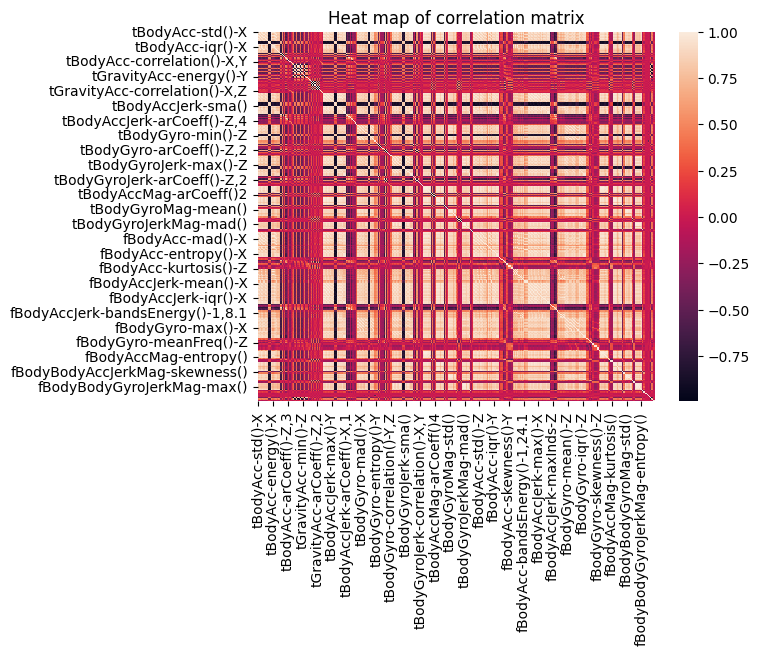

In [ ]:
sns.heatmap(x_train.corr())
plt.title("Heat map of correlation matrix")
plt.show()

In [ ]:
corr_matrix = x_train.corr()

In [ ]:
columns = corr_matrix.columns

columns_to_drop = []

for i in range(len(columns)):
  for j in range(i + 1, len(columns)):
    if corr_matrix.loc[columns[i], columns[j]] > 0.95:
      columns_to_drop.append(columns[j])

print(len(columns_to_drop))

columns_to_drop = set(columns_to_drop)

print(len(columns_to_drop))

1508
197


In [ ]:
for col in columns_to_drop:
  x_train.drop(columns= col, axis= 1, inplace= True)
  x_test.drop(columns= col, axis= 1, inplace= True)

In [ ]:
print("Shape of X_train after applying Correlation technique of feature selection: ", x_train.shape)
print("Shape of X_test after applying Correlation technique of feature selection: ", x_test.shape)

Shape of X_train after applying Correlation technique of feature selection:  (5881, 153)
Shape of X_test after applying Correlation technique of feature selection:  (1471, 153)


#### 4. ANOVA

In [ ]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(f_classif, k= 100).fit(x_train, y_train)

x_train.columns[selector.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [ ]:
columns = x_train.columns[selector.get_support()]

In [ ]:
x_train = selector.transform(x_train)
x_test = selector.transform(x_test)

x_train = pd.DataFrame(x_train, columns= columns)
x_test = pd.DataFrame(x_test, columns= columns)

In [ ]:
print("Shape of X_train after applying ANOVA technique of feature selection: ", x_train.shape)
print("Shape of X_test after applying ANOVA technique of feature selection: ", x_test.shape)

Shape of X_train after applying ANOVA technique of feature selection:  (5881, 100)
Shape of X_test after applying ANOVA technique of feature selection:  (1471, 100)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Fitting the logistics regression
model = LogisticRegression(max_iter= 1000)
model.fit(x_train, y_train)

# Predicting
y_pred = model.predict(x_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)

print("The accuracy is: ", round(accuracy * 100, 2))

The accuracy is:  96.94
